<a href="https://colab.research.google.com/github/MikIwoTur/Alzheimer_Project/blob/main/Alzheimer_Project(English).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTS AND DISC CONNECTION**
__________________________________________________________________________________________

In [3]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.0 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import drive
import umap
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, silhouette_samples, r2_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import AgglomerativeClustering
from imblearn.over_sampling import SMOTE
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist
warnings.filterwarnings("ignore")

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


<h1> FIRST INFO

# **DATA CONTENTS**
__________________________________________________________________________________________

In [6]:
Alz_dt = pd.read_csv("/content/drive/MyDrive/Nauczanie Maszynowe/alzheimers_disease_data.csv")

In [7]:
Alz_dt.head()

PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0                   0  1.725883          0               0   
1                   0  2.592424          0               0   
2                   0  7.119548          0               1   
3                   1  6.481226          0               0   
4                   0  0.014691          0               0   

   PersonalityChanges  DifficultyCompletingTasks  Forgetfulness  Diagnosis  \
0                   0                          1              0          0   
1                   0                          0              1          0   
2                   0                          1              0          0   
3                   0                          0              0          0   
4                   1                          1              0          0   

   DoctorInCharge  
0       XXXConfid  
1       XXXConfid  
2       XXXConfid  
3       XXXConfid  
4       XXXConfid  

[5 rows x 35 columns]

In [8]:
Alz_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [9]:
Alz_dt.describe()

PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
mean   5825.000000    74.908795     0.506282     0.697534        1.286645   
std     620.507185     8.990221     0.500077     0.996128        0.904527   
min    4751.000000    60.000000     0.000000     0.000000        0.000000   
25%    5288.000000    67.000000     0.000000     0.000000        1.000000   
50%    5825.000000    75.000000     1.000000     0.000000        1.000000   
75%    6362.000000    83.000000     1.000000     1.000000        2.000000   
max    6899.000000    90.000000     1.000000     3.000000        3.000000   

               BMI      Smoking  AlcoholConsumption  PhysicalActivity  \
count  2149.000000  2149.000000         2149.000000       2149.000000   
mean     27.655697     0.288506           10.039442          4.920202   
std       7.217438     0.453173            5.757910          2.857191   
min      15.008851     0.000000            0.002003          0.003616   
25%      21.611408     0.000000            5.139810          2.570626   
50%      27.823924     0.000000            9.934412          4.766424   
75%      33.869778     1.000000           15.157931          7.427899   
max      39.992767     1.000000           19.989293          9.987429   

       DietQuality  ...  FunctionalAssessment  MemoryComplaints  \
count  2149.000000  ...           2149.000000       2149.000000   
mean      4.993138  ...              5.080055          0.208004   
std       2.909055  ...              2.892743          0.405974   
min       0.009385  ...              0.000460          0.000000   
25%       2.458455  ...              2.566281          0.000000   
50%       5.076087  ...              5.094439          0.000000   
75%       7.558625  ...              7.546981          0.000000   
max       9.998346  ...              9.996467          1.000000   

       BehavioralProblems          ADL    Confusion  Disorientation  \
count         2149.000000  2149.000000  2149.000000     2149.000000   
mean             0.156817     4.982958     0.205212        0.158213   
std              0.363713     2.949775     0.403950        0.365026   
min              0.000000     0.001288     0.000000        0.000000   
25%              0.000000     2.342836     0.000000        0.000000   
50%              0.000000     5.038973     0.000000        0.000000   
75%              0.000000     7.581490     0.000000        0.000000   
max              1.000000     9.999747     1.000000        1.000000   

       PersonalityChanges  DifficultyCompletingTasks  Forgetfulness  \
count         2149.000000                2149.000000    2149.000000   
mean             0.150768                   0.158678       0.301536   
std              0.357906                   0.365461       0.459032   
min              0.000000                   0.000000       0.000000   
25%              0.000000                   0.000000       0.000000   
50%              0.000000                   0.000000       0.000000   
75%              0.000000                   0.000000       1.000000   
max              1.000000                   1.000000       1.000000   

         Diagnosis  
count  2149.000000  
mean      0.353653  
std       0.478214  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  

[8 rows x 34 columns]

In [10]:
Alz_dt.nunique()

PatientID                    2149
Age                            31
Gender                          2
Ethnicity                       4
EducationLevel                  4
BMI                          2149
Smoking                         2
AlcoholConsumption           2149
PhysicalActivity             2149
DietQuality                  2149
SleepQuality                 2149
FamilyHistoryAlzheimers         2
CardiovascularDisease           2
Diabetes                        2
Depression                      2
HeadInjury                      2
Hypertension                    2
SystolicBP                     90
DiastolicBP                    60
CholesterolTotal             2149
CholesterolLDL               2149
CholesterolHDL               2149
CholesterolTriglycerides     2149
MMSE                         2149
FunctionalAssessment         2149
MemoryComplaints                2
BehavioralProblems              2
ADL                          2149
Confusion                       2
Disorientation                  2
PersonalityChanges              2
DifficultyCompletingTasks       2
Forgetfulness                   2
Diagnosis                       2
DoctorInCharge                  1
dtype: int64

<h1> PREPARING DATA FOR ANALYSIS

There are no nulls in the data set and all values ​​are numeric, however it is good practice to ensure that there are no such cases in the data

In [11]:
print(Alz_dt.isnull().sum())
Alz_dt = Alz_dt.dropna()
Alz_dt = pd.get_dummies(Alz_dt, drop_first=True)

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

Not all data in the set is useful for general analysis. In this case it is:

"PatientID" - numeric designation of patients that does not affect the analysis, only indicates which data comes from whom in the original set

"DoctorInCharge" - doctor who treated a given patient, also data irrelevant to our analysis

Therefore they will be removed from further processing.

In [12]:
Alz_dt = Alz_dt.drop(['PatientID', 'DoctorInCharge'], axis=1, errors='ignore')

In [13]:
usable_columns = []

for col in Alz_dt.columns:
  if Alz_dt[col].nunique() > 10:
    usable_columns.append(col)

print(usable_columns)

['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']


Here we have columns that have a real meaning for us and are not binary, so we can use some data on them

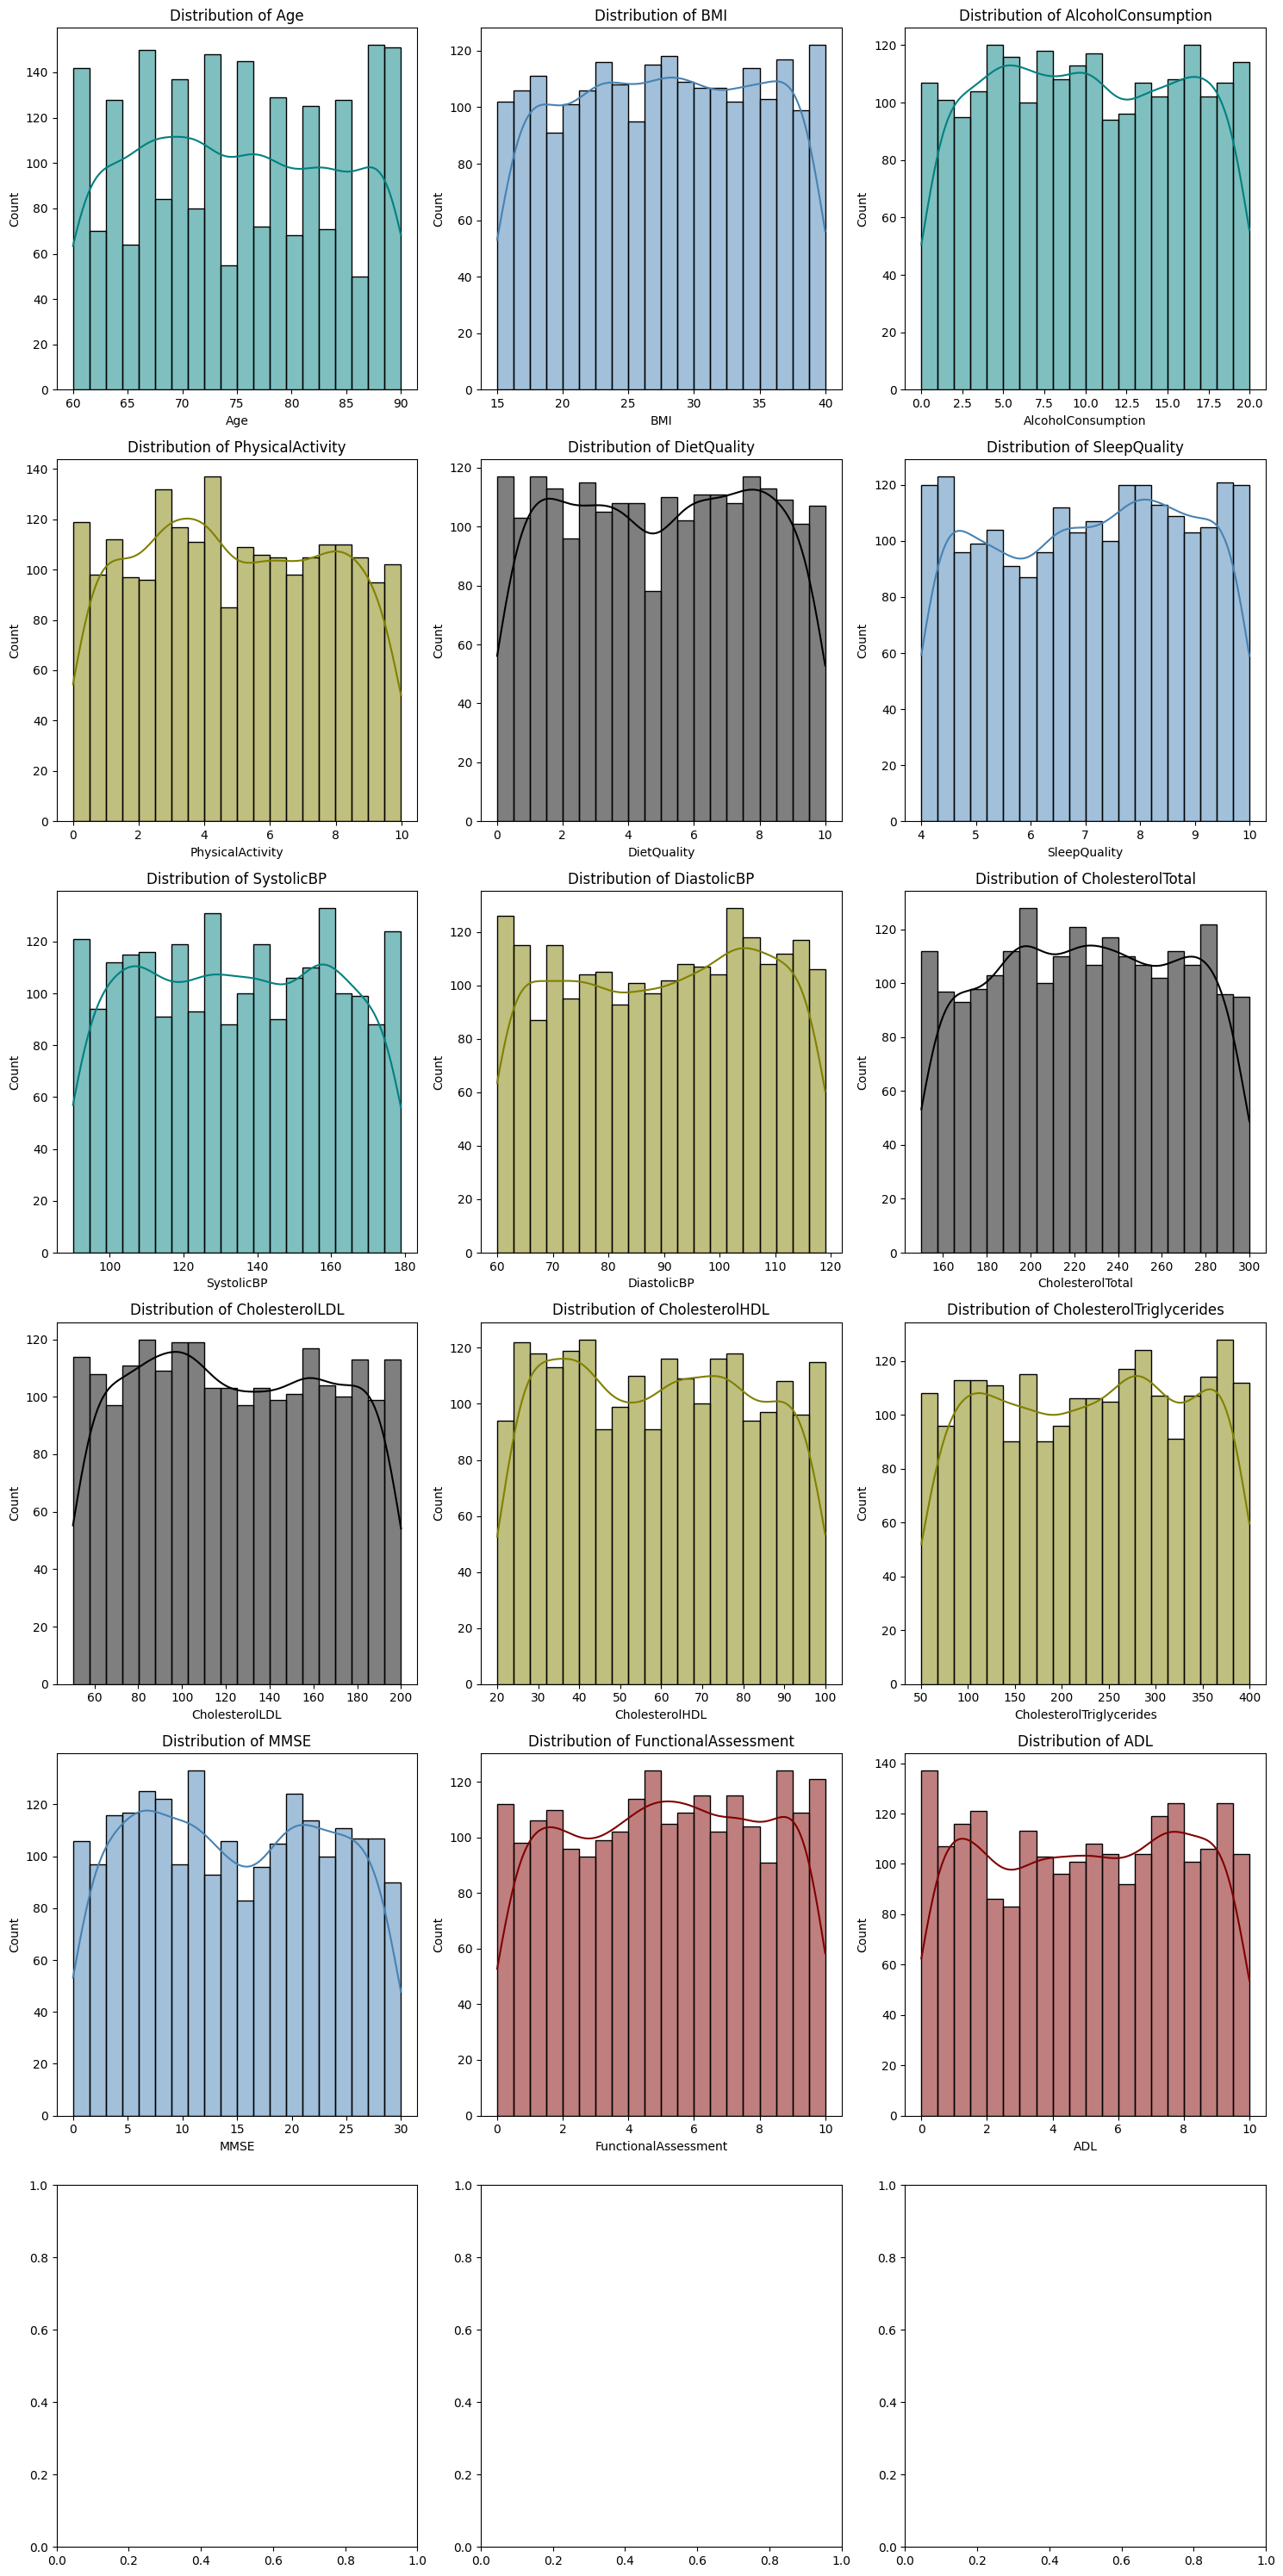

In [14]:
color = ["teal", "olive", "maroon", "k", "steelblue"]
color_picking = np.random.choice(color, size=len(usable_columns))

# Number of columns to visualize
num_cols = len(usable_columns)

# Number of columns to visualize
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, 5 * ((num_cols // 3) + 1)))
axes = axes.flatten()  # We "flatten" the axes to make it easy to iterate

# Iterate through columns and draw graphs
for i, col in enumerate(usable_columns):
    ax = axes[i]
    sns.histplot(Alz_dt[col], bins=20, color=color_picking[i], ax=ax, kde=True)  # KDE histogram
    ax.set_title(f'Distribution of {col}')

#Improve layout
plt.tight_layout()
# Displaying charts
plt.show()

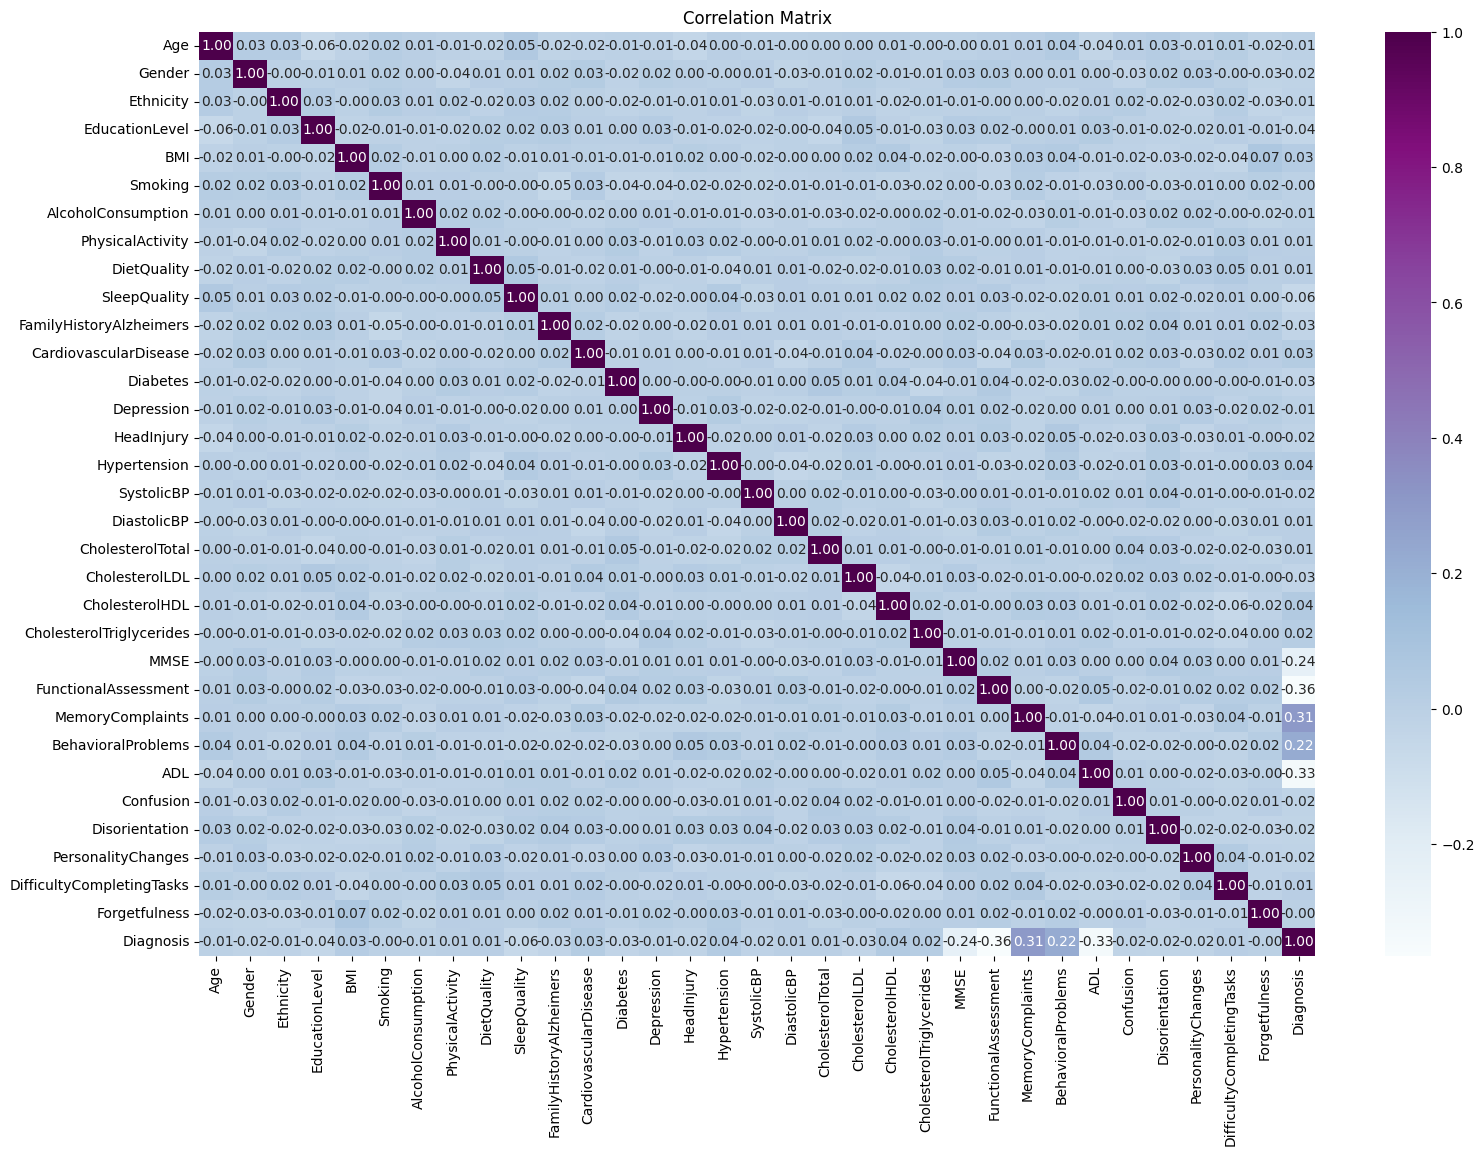

In [15]:
corr_matrix = Alz_dt.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='BuPu')
plt.title('Correlation Matrix')
plt.show()

<h1> DATA PREPROCESSING ( PREPARATION FOR FURTHER ANALYSIS )

Data should also be checked for decomposition to avoid bias in subsequent parts of the analysis.

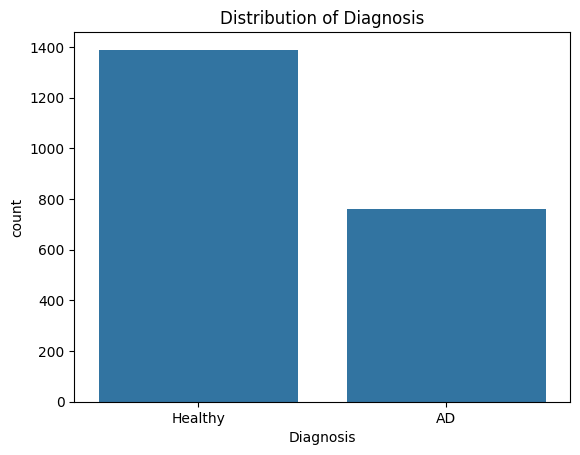

In [16]:
sns.countplot(x='Diagnosis', data=Alz_dt)
plt.title('Distribution of Diagnosis')
plt.xticks([0, 1], ['Healthy', 'AD'])
plt.show()

It can be seen that there is significantly more information about healthy people than about people diagnosed with Alzheimer's disease (so the data set is unbalanced).

This means that when analyzing this data using machine learning methods, we risk bias on the side of healthy people. Additionally, there is not much data (around 2200 in total), which suggests using a method that "adds" more sick people instead of one that removes healthy people; reducing the amount of data could result in a lack of sufficient data to properly train the model.

However, it should be taken into account that artificial data generation is not always the right solution, e.g. in the case of medical data that we use, it can generate unrealistic cases, e.g. a person aged 20 suffering from Alzheimer's. However, for the purposes of further analysis, additional data was required.

**SMITE, OR A METHOD FOR SOLVING THE PROBLEM OF BIAS**

In [17]:
X = Alz_dt.drop('Diagnosis', axis=1)
y = Alz_dt['Diagnosis']

In [18]:
X = Alz_dt.iloc[:, :-1].values
y = Alz_dt.iloc[:, -1].values

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [21]:
print(f"Rozkład przed SMOTE:{dict(zip(*np.unique(y_train, return_counts=True)))}")
print(f"Rozkład po SMOTE: {dict(zip(*np.unique(y_resampled, return_counts=True)))}")

Rozkład przed SMOTE:{0: 1112, 1: 607}
Rozkład po SMOTE: {0: 1112, 1: 1112}


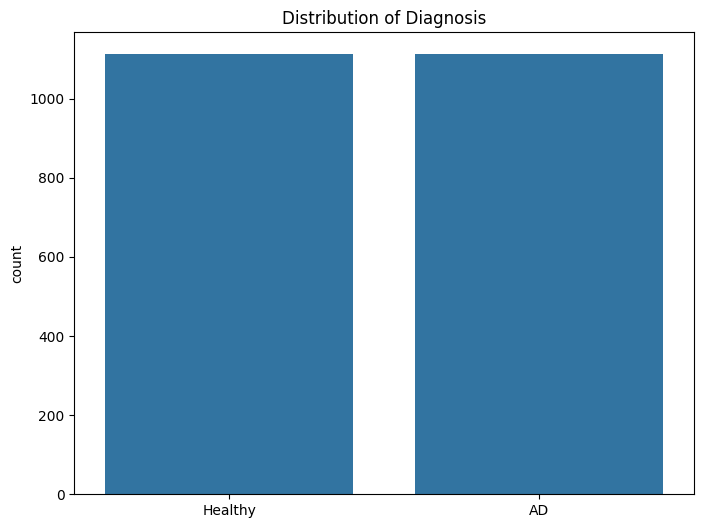

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Distribution of Diagnosis')
plt.xticks([0, 1], ['Healthy', 'AD'])
plt.show()

<h1> PCA and other dimensionality reduction methods

In order to perform multifactorial analysis, the use of dimension reduction methods was considered, which would allow for the analysis of factors with the greatest impact on the data and then clustering in order to divide them into subgroups (which allows for seeing whether groups with similar features are created)

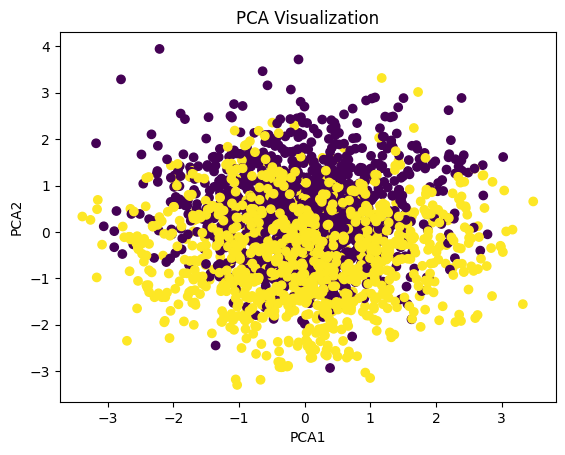

In [23]:
pca = PCA(n_components=0.95) # we want the resulting components to explain 95% of the data
X_resampled_pca = pca.fit_transform(X_resampled)

plt.scatter(X_resampled_pca[:, 0], X_resampled_pca[:, 1], c=y_resampled, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA Visualization')
plt.show()

In [24]:
print(len(Alz_dt.columns))
print(len(pca.components_))

33
30


This means that 30 of the 33 components explain a total of 95% of the data.

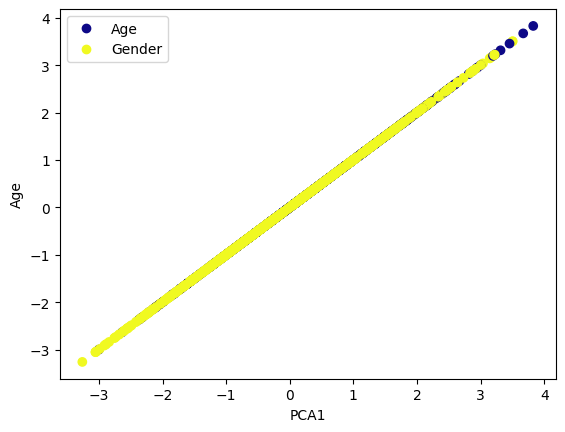

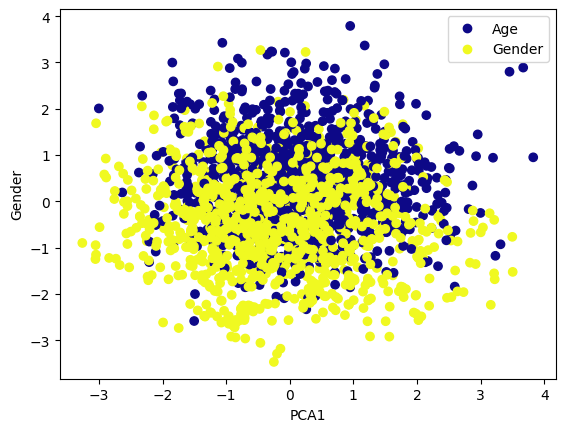

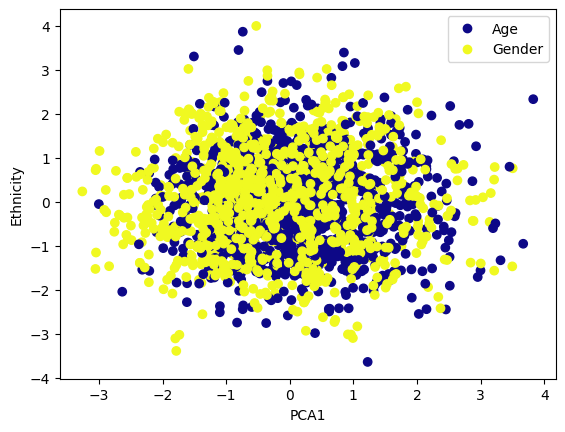

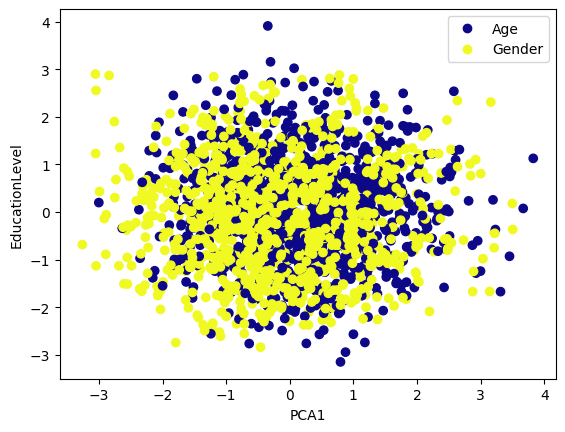

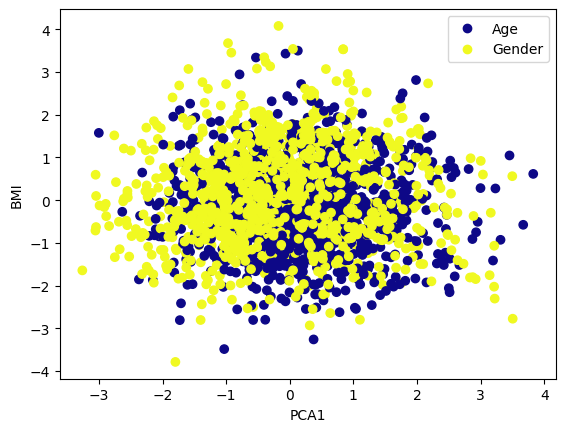

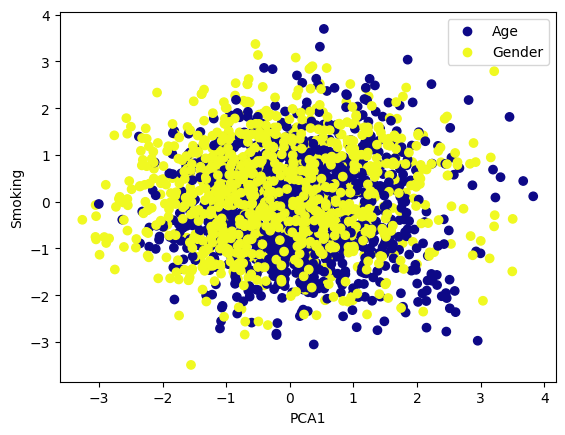

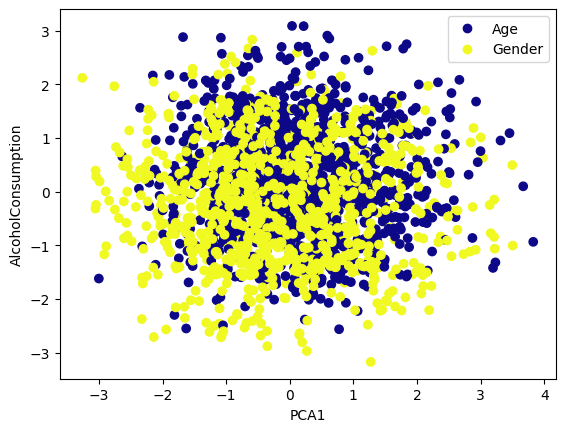

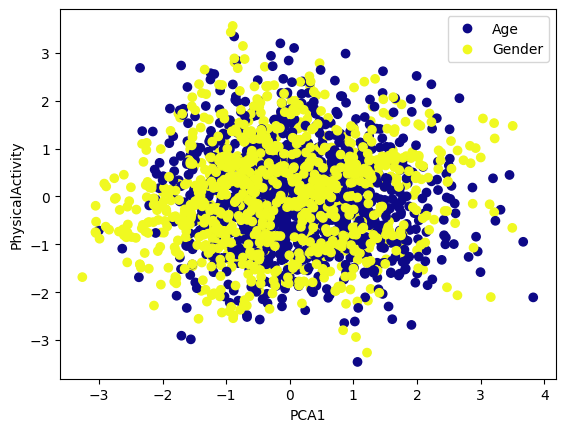

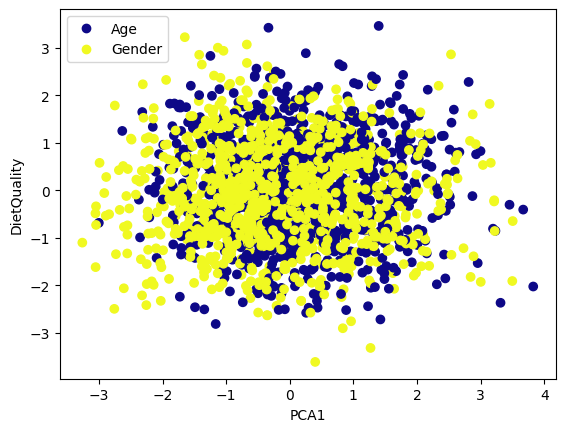

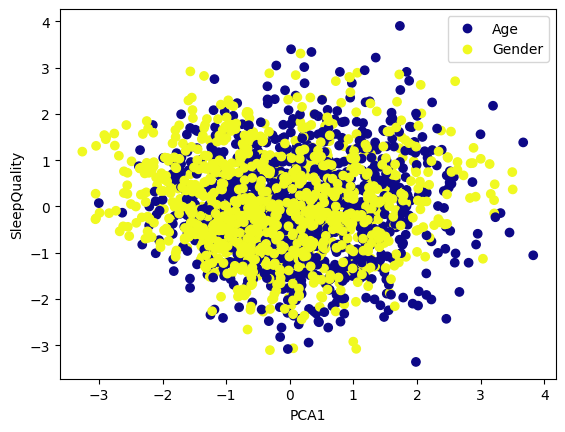

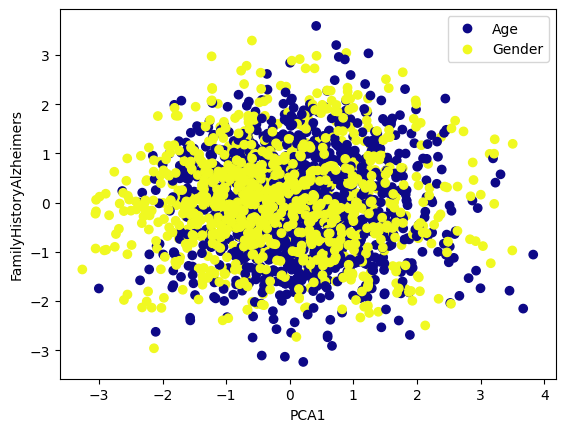

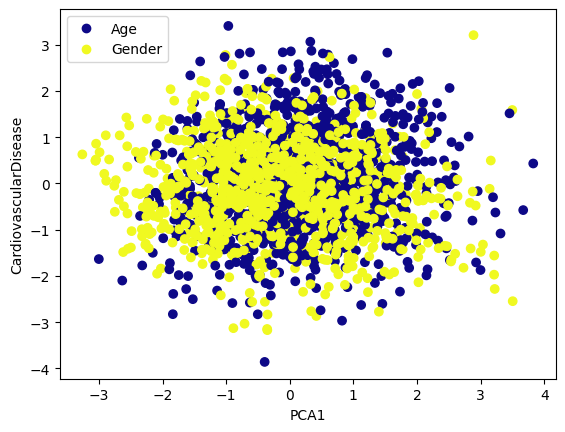

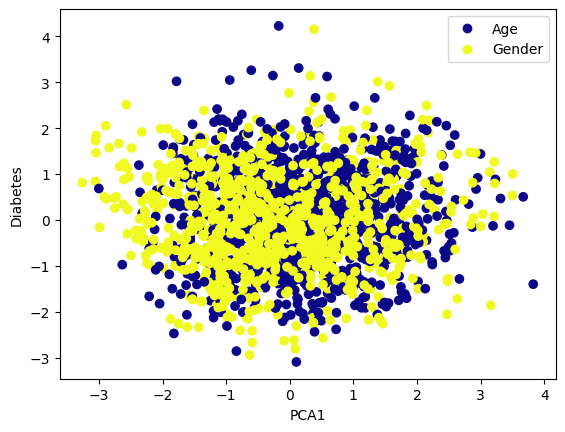

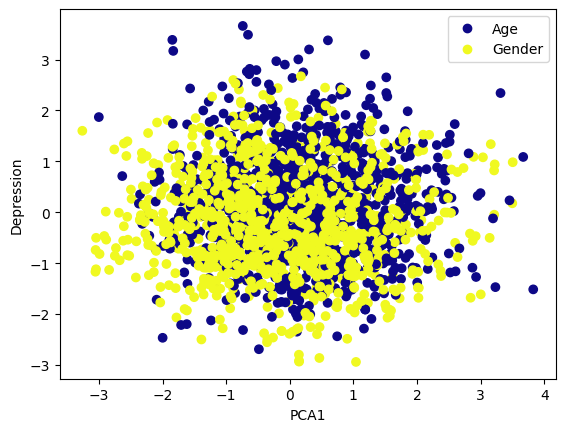

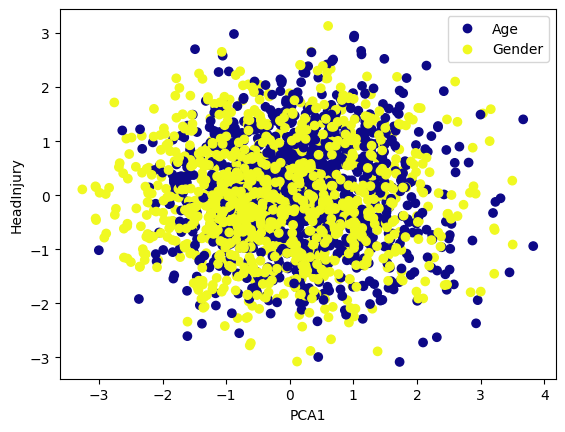

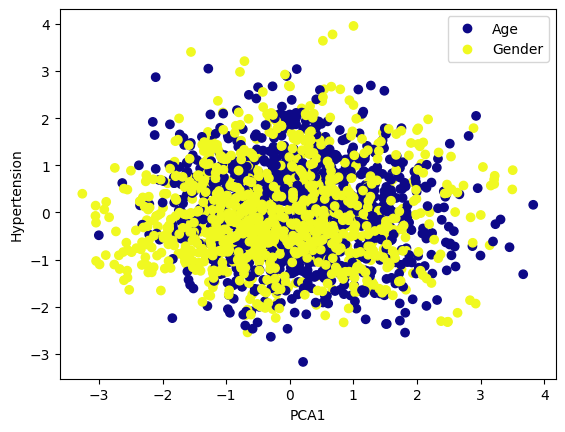

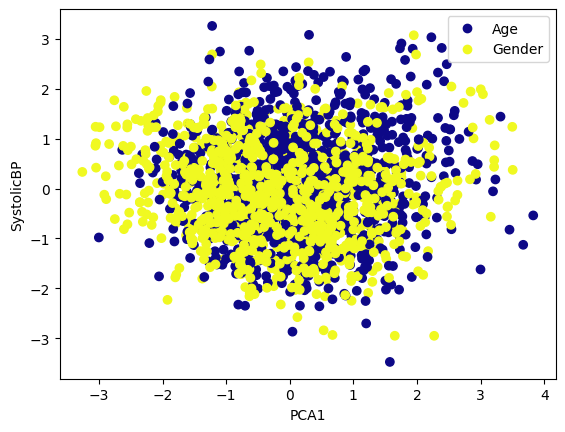

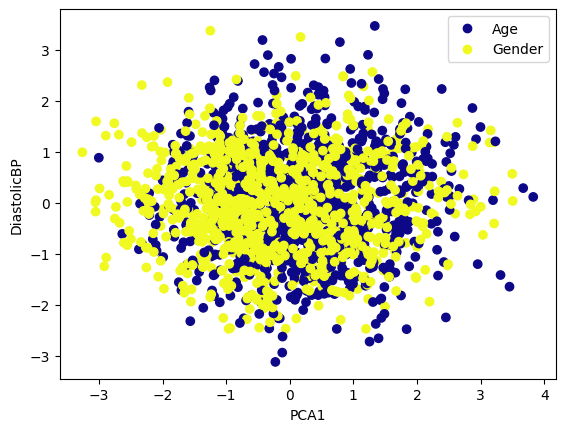

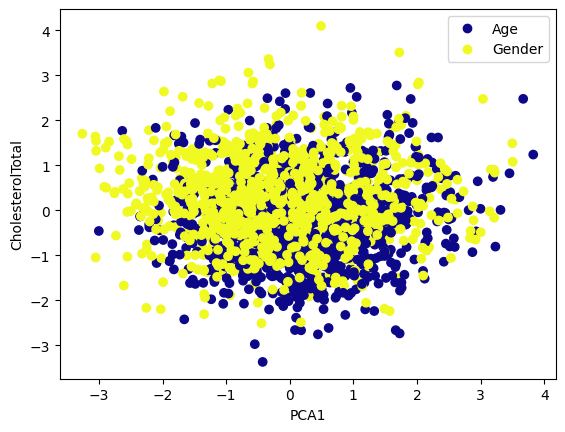

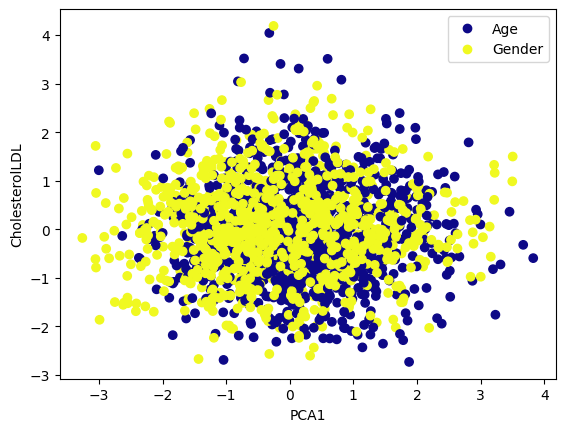

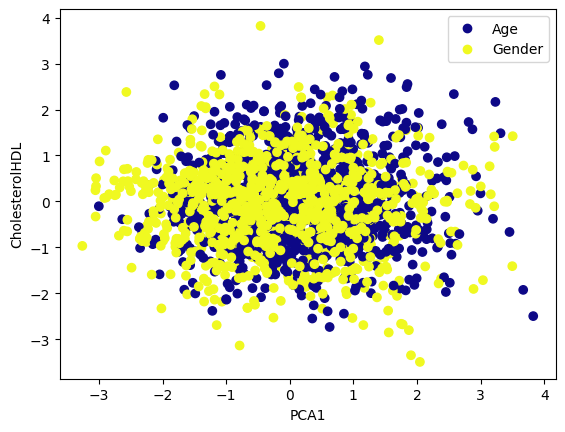

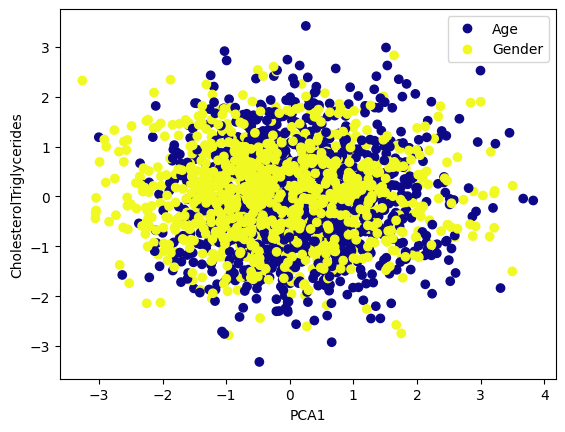

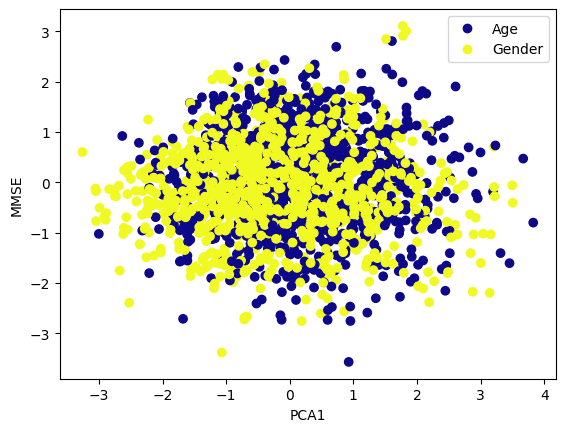

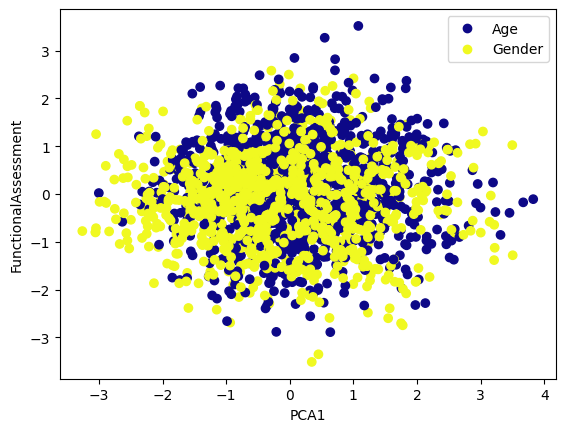

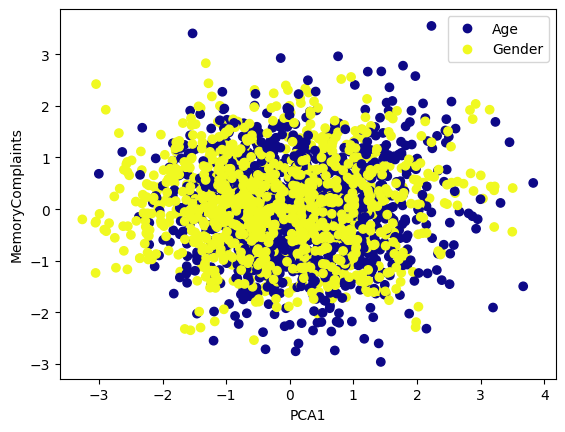

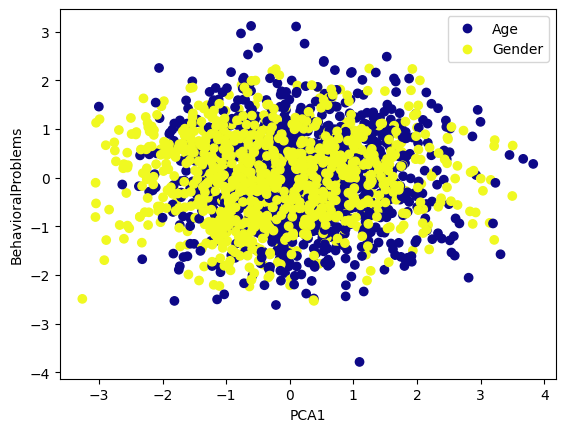

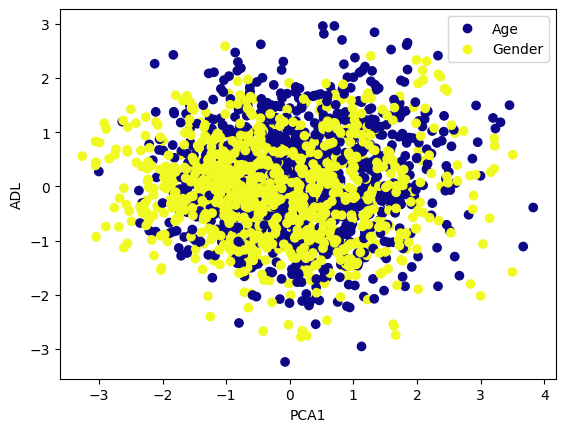

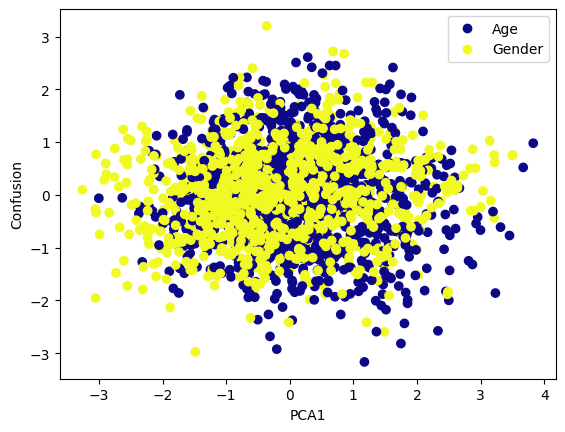

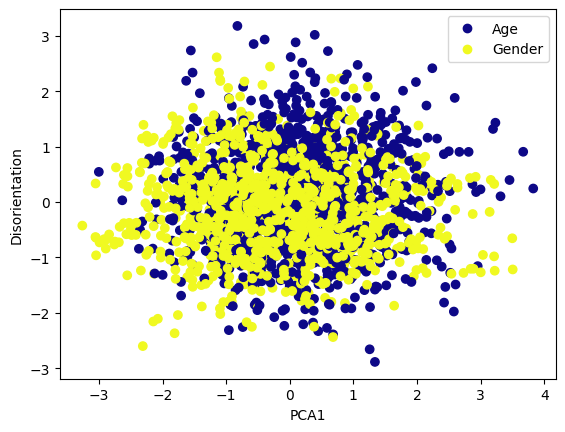

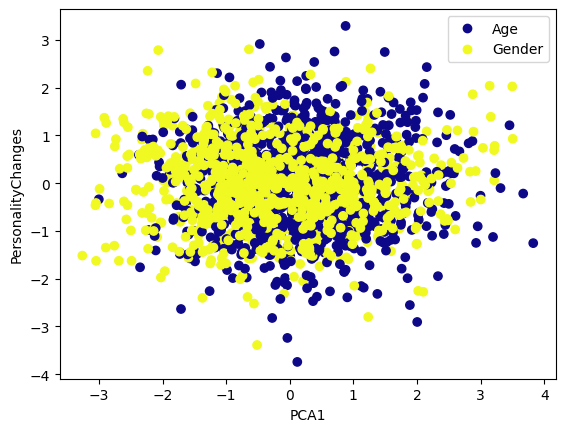

In [25]:
for i in range(30):
  pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
  Xt = pipe.fit_transform(X_resampled)
  plot = plt.scatter(Xt[:,0], Xt[:, i], c=y_resampled, cmap='plasma')
  plt.xlabel('PCA1')
  plt.ylabel(Alz_dt.columns[i])
  plt.legend(handles=plot.legend_elements()[0], labels=list(Alz_dt))
  plt.show()

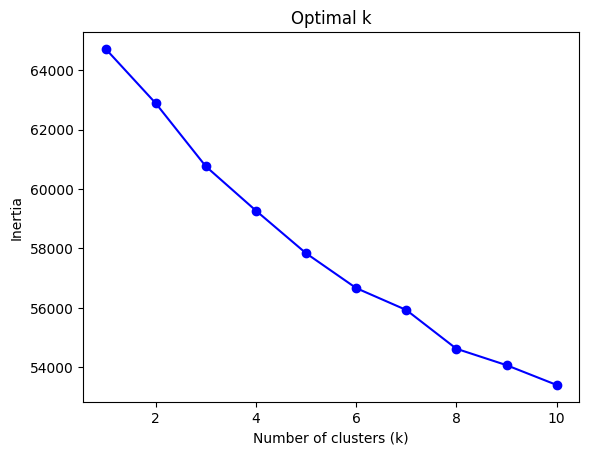

In [26]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_resampled_pca)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Optimal k')
plt.show()

The "elbow" method is one of the methods that allows determining the theoretical most optimal number of clusters to divide the data. This allows performing clustering on a smaller number of cases. For our data, the potential most optimal number of clusters will be 4, 5 or 6.

Silhouette Score: 0.03627431059634699


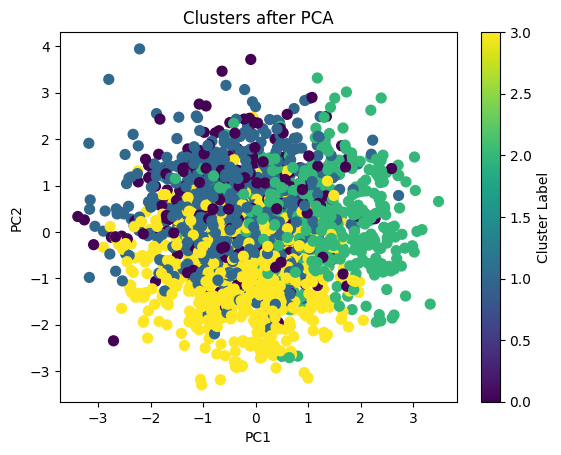

Silhouette Score: 0.043003973656052026


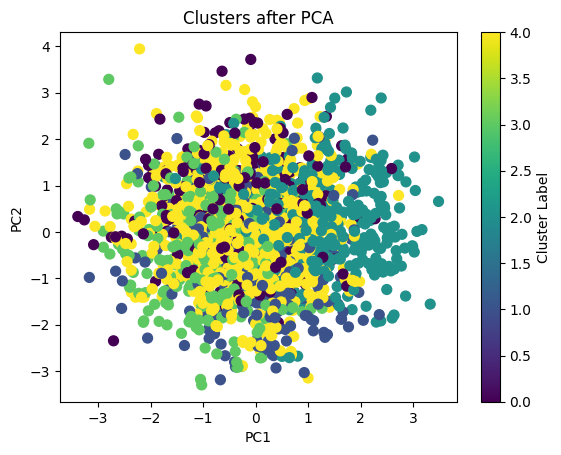

Silhouette Score: 0.040233632561725415


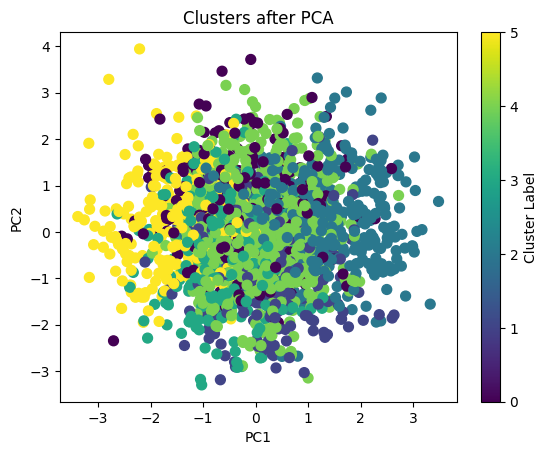

In [27]:
k = [4,5,6]

for elem in k:
  kmeans = KMeans(n_clusters=elem, random_state=42)
  clusters = kmeans.fit_predict(X_resampled_pca)

  silhouette_avg = silhouette_score(X_resampled_pca, clusters)
  print(f"Silhouette Score: {silhouette_avg}")

  plt.scatter(X_resampled_pca[:, 0], X_resampled_pca[:, 1], c=clusters, cmap='viridis', s=50)
  plt.title('Clusters after PCA')
  plt.xlabel('PC1')
  plt.ylabel('PC2')
  plt.colorbar(label='Cluster Label')
  plt.show()

When using regular PCA, the clusters are not well separated from each other in the K-means method. The silhouette score is used to assess the quality of clustering. It is assumed that the closer it is to 1, the better. It is often assumed that the silhouette score > 0.5 indicates good clustering. In the case of K-means clustering on the data after PCA, it can be seen that the silhouette score is very low, which means that this method is significantly inappropriate for analyzing this data.

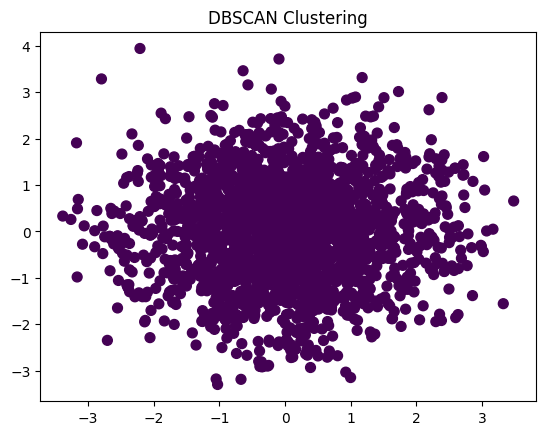

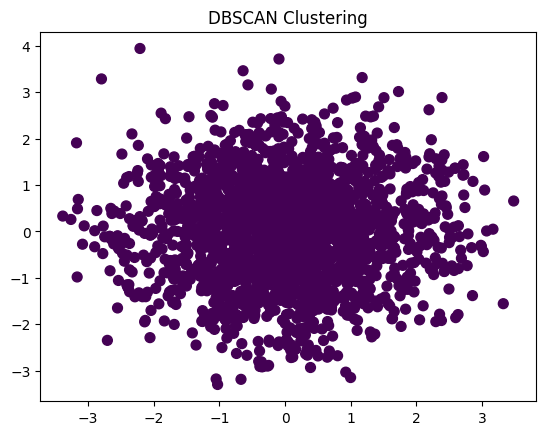

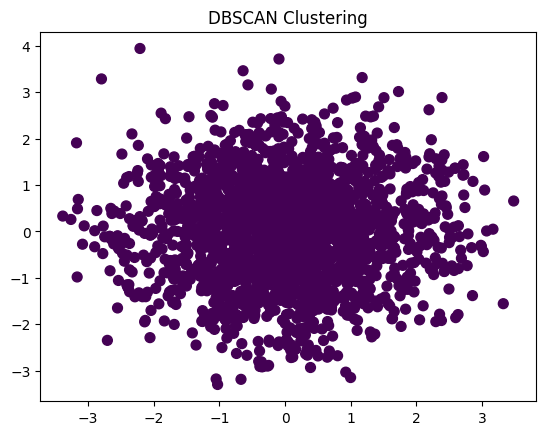

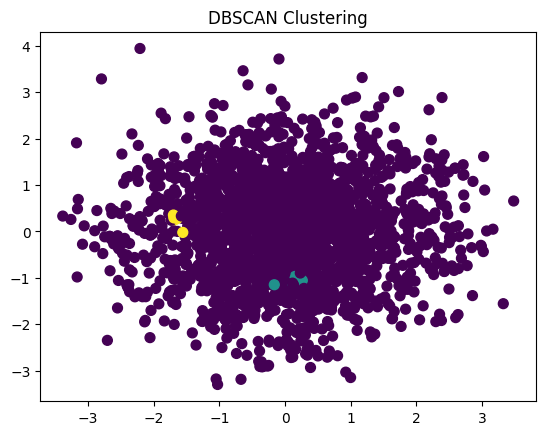

In [28]:
eps = [0.001,0.01,0.1,1]

for elem in eps:
  dbscan = DBSCAN(eps=elem, min_samples=5)
  clusters = dbscan.fit_predict(X_resampled_pca)

  plt.scatter(X_resampled_pca[:, 0], X_resampled_pca[:, 1], c=clusters, cmap='viridis', s=50)
  plt.title('DBSCAN Clustering')
  plt.show()

DBSCAN clustering also turned out to be not a suitable method for analysis.

Silhouette Score: 0.026413775021482244


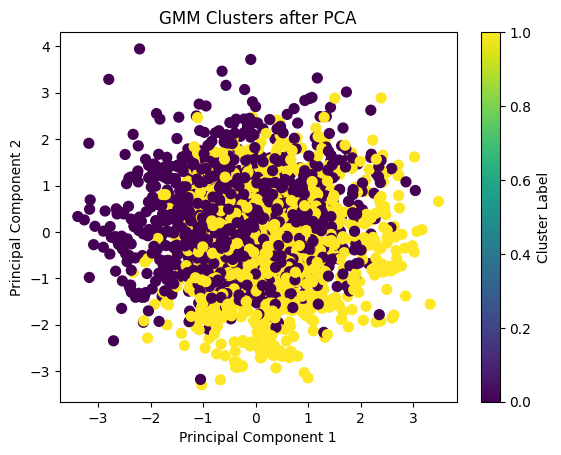

Silhouette Score: 0.04427020463941574


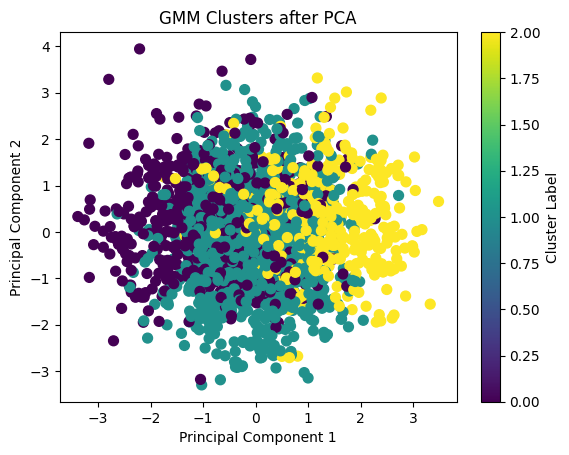

Silhouette Score: 0.04694054738812079


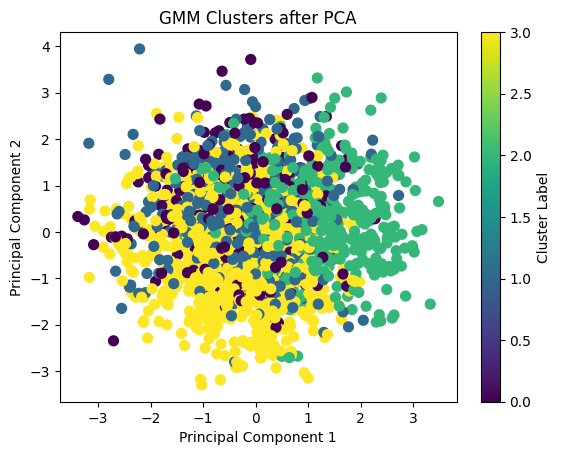

Silhouette Score: 0.03764548786478754


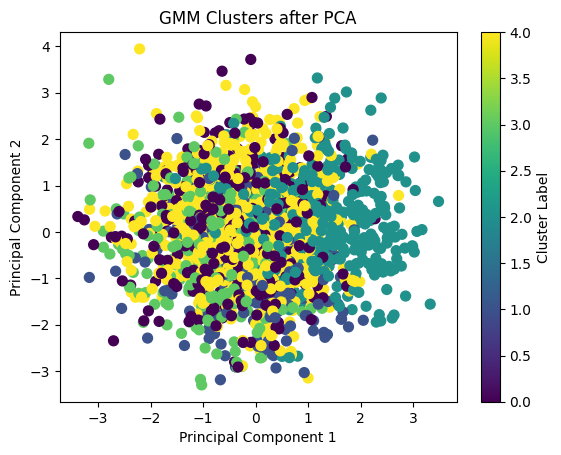

In [29]:
n_components = [2,3,4,5]

for elem in n_components:
  gmm = GaussianMixture(n_components=elem, random_state=42)
  gmm_labels = gmm.fit_predict(X_resampled_pca)

  silhouette_avg = silhouette_score(X_resampled_pca, gmm_labels)
  print(f"Silhouette Score: {silhouette_avg}")

  plt.scatter(X_resampled_pca[:, 0], X_resampled_pca[:, 1], c=gmm_labels, cmap='viridis', s=50)
  plt.title('GMM Clusters after PCA')
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.colorbar(label='Cluster Label')
  plt.show()

The GMM method also proved to be inefficient.

Therefore, another dimensionality reduction method than PCA was considered, namely the UMAP method.

UMAP is a nonlinear technique that focuses on preserving the local structure of the data. It is well suited for high-dimensionality data, it can be seen that PCA reduced only 3 out of 33 dimensions, which may mean that PCA is not a suitable method for analyzing this data.

**Preparing UMAP in 2 dimensions**

In [30]:
umap_model_2d = umap.UMAP(n_components=2, random_state=42)# 2 components to preserve two-dimensionality of data
X_umap_2d = umap_model_2d.fit_transform(X_resampled)

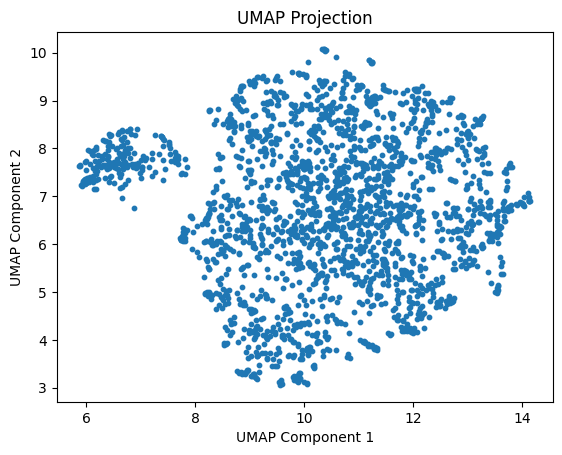

In [32]:
# Dimension reduction results
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], s=10)
plt.title('UMAP Projection')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

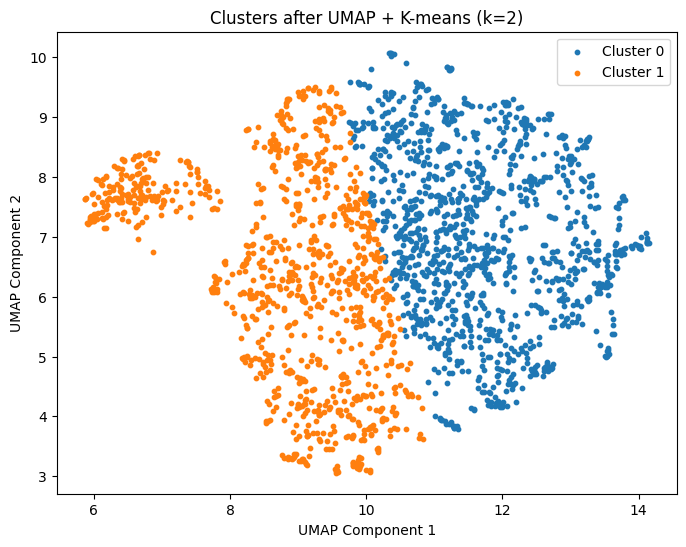

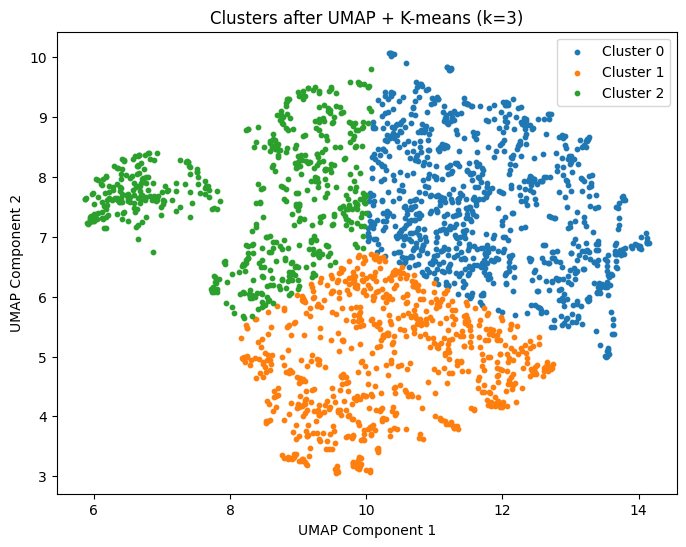

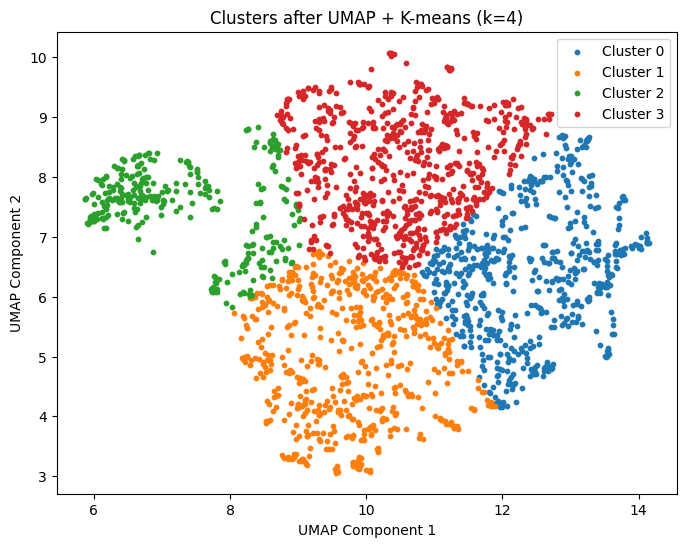

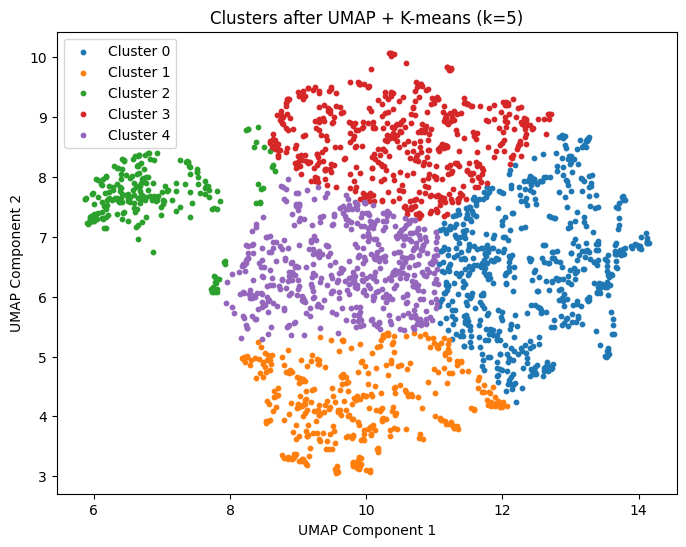

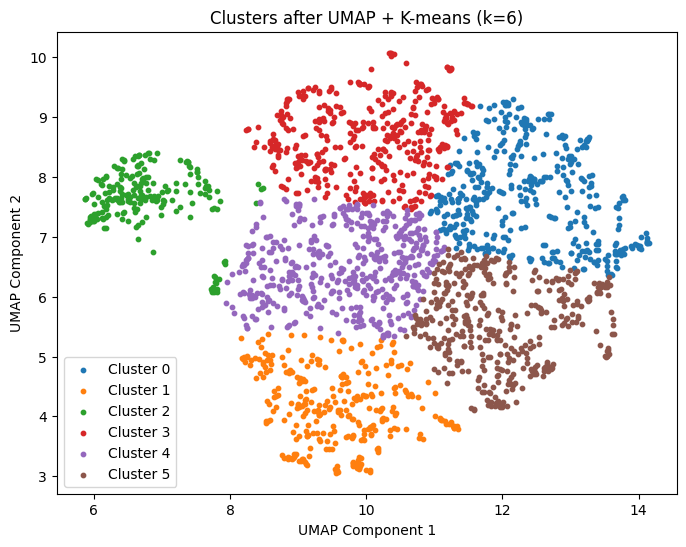

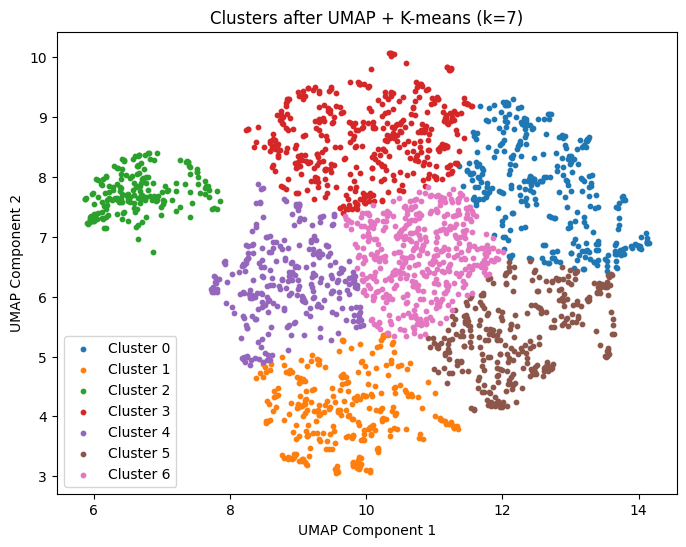

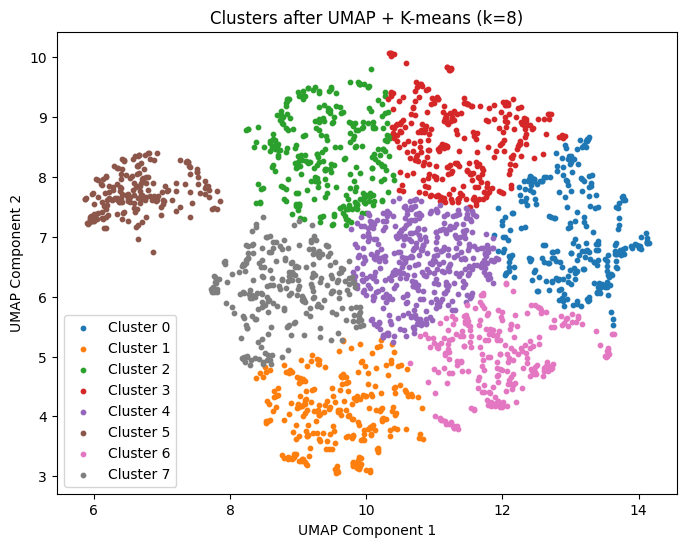

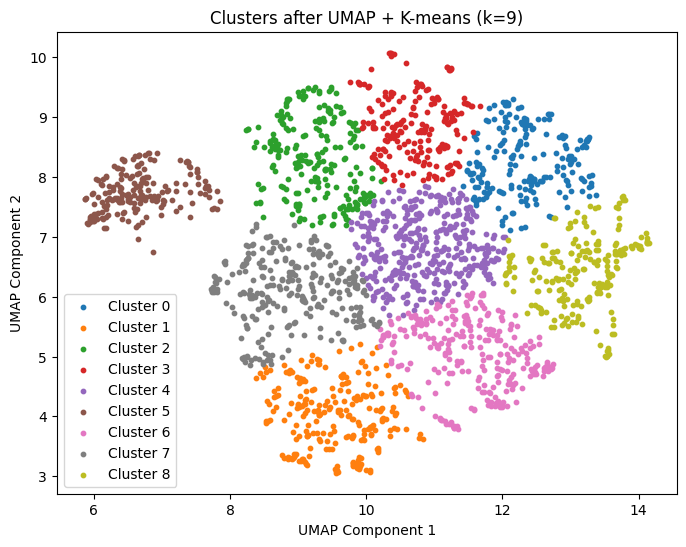

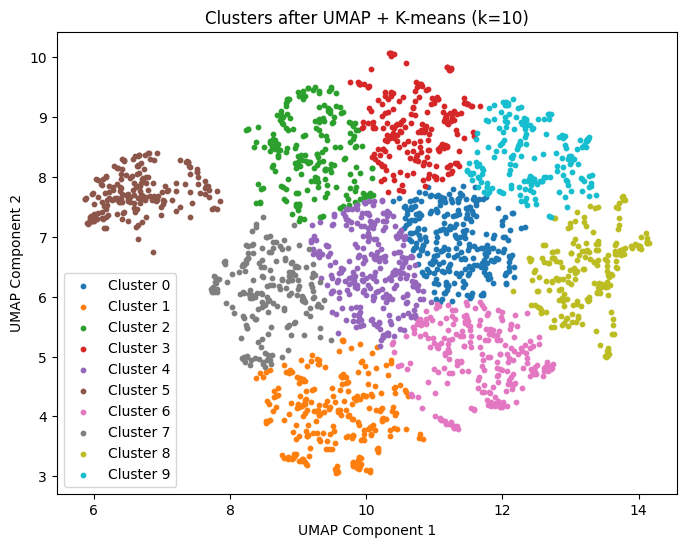

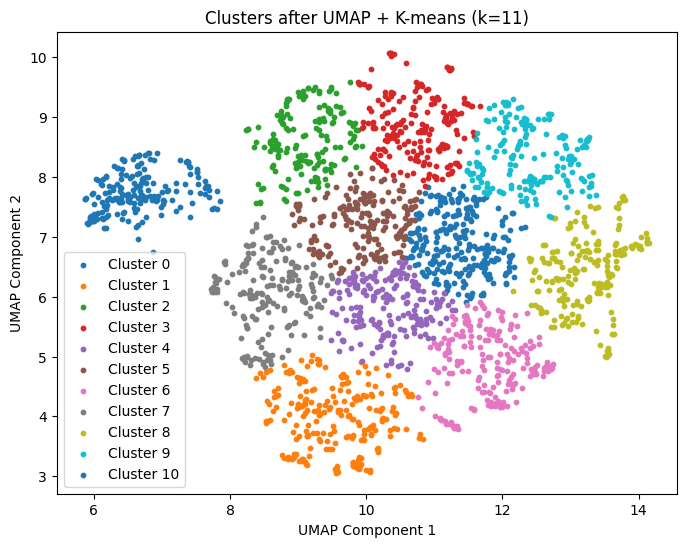

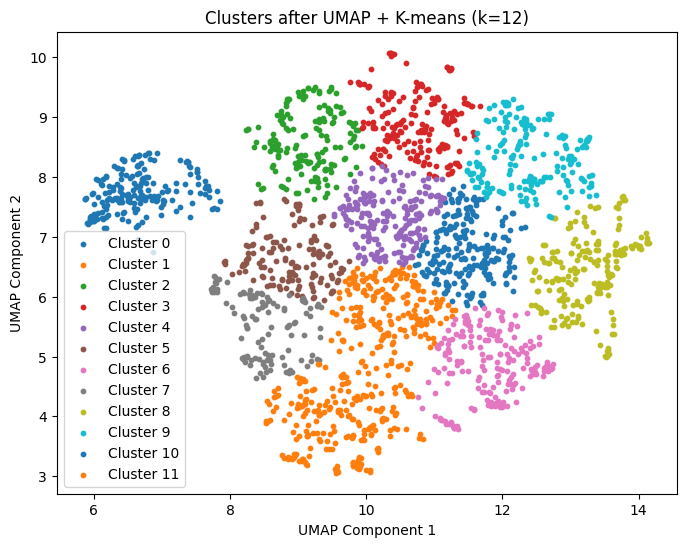

Best silhouette score is: 0.4268838167190552 which corresponds to 11 clusters


In [33]:
# testing different number of clusters to describe the data (and deciding on the best based on silhouette score)

n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
n_cluster = 0
score = 0

for elem in n_clusters:
    kmeans = KMeans(n_clusters=elem, random_state=42)
    kmeans.fit(X_umap_2d)

    cluster_labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_

    sil_score = silhouette_score(X_umap_2d, cluster_labels)

    if sil_score > score:
        score = sil_score
        n_cluster = elem

    plt.figure(figsize=(8, 6))
    for cluster in np.unique(cluster_labels):
        cluster_points = X_umap_2d[np.where(cluster_labels == cluster)]
        plt.scatter(
            cluster_points[:, 0],
            cluster_points[:, 1],
            s=10,
            label=f'Cluster {cluster}'
        )

    plt.title(f'Clusters after UMAP + K-means (k={elem})')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.legend()
    plt.show()

print(f"Best silhouette score is: {score} which corresponds to {n_cluster} clusters")

In [34]:
# Save clustering results for best result
kmeans = KMeans(n_clusters=n_cluster, random_state=42)
kmeans.fit(X_umap_2d)

cluster_labels = kmeans.labels_

In [35]:
# Adding information to the data which cluster they were assigned to
resampled_df = pd.DataFrame(X_resampled, columns=Alz_dt.columns[:-1])
resampled_df['Diagnosis'] = y_resampled
resampled_df['Cluster'] = cluster_labels

In [36]:
# How many cases were assigned to a given cluster
print(resampled_df['Cluster'].value_counts())

Cluster
0     255
1     242
3     205
8     201
6     198
5     194
7     194
4     193
10    189
9     186
2     167
Name: count, dtype: int64


In [37]:
cluster_summary = resampled_df.groupby('Cluster').agg(['mean', 'median', 'count'])
print(cluster_summary)

              Age                    Gender                 Ethnicity  \
             mean    median count      mean    median count      mean   
Cluster                                                                 
0       -0.055703 -0.212368   255  0.178203  0.987514   255  0.052464   
1       -0.027791 -0.085644   242 -0.055657 -0.527494   242 -0.052669   
2       -0.012217 -0.101111   167 -0.024227  0.061654   167 -0.024522   
3        0.130261  0.232663   205 -0.045651 -0.806380   205 -0.170362   
4        0.072448  0.232663   193  0.069750  0.680394   193 -0.357461   
5        0.326991  0.343921   194  0.019135  0.987514   194  0.030219   
6       -0.129739 -0.212368   198 -0.252270 -1.012644   198 -0.069261   
7        0.069553  0.121405   194  0.097170  0.987514   194  0.107449   
8       -0.048548 -0.178690   201  0.148988  0.987514   201 -0.126091   
9       -0.015592  0.010147   186 -0.191426 -1.012644   186  0.413603   
10      -0.063767 -0.101111   189 -0.050399 -0.6679

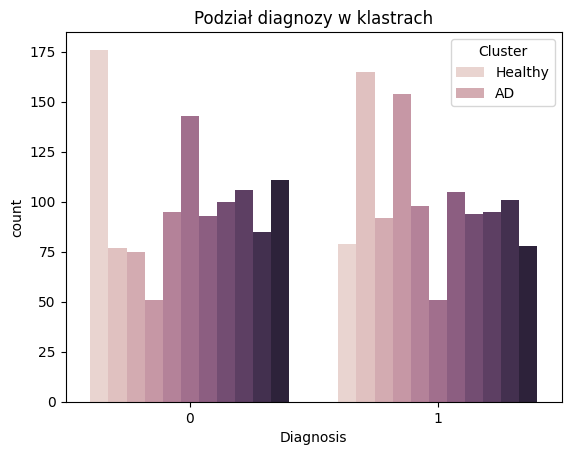

In [38]:
sns.countplot(data=resampled_df, x='Diagnosis', hue='Cluster')
plt.title('Podział diagnozy w klastrach')
plt.legend(title='Cluster', labels=['Healthy', 'AD'])
plt.show()

Silhouette Score: 0.4268838167190552


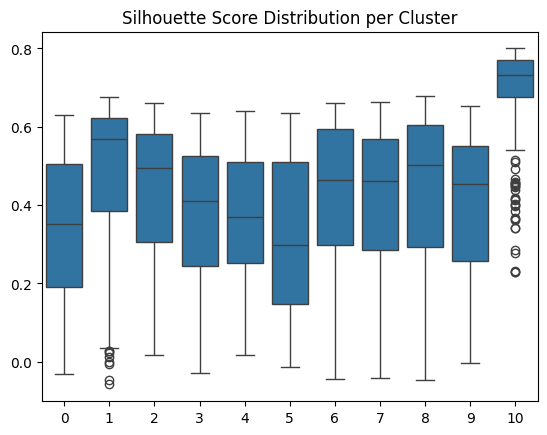

In [41]:
sil_score = silhouette_score(X_umap_2d, cluster_labels)
print(f"Silhouette Score: {sil_score}")

sil_samples = silhouette_samples(X_umap_2d, cluster_labels)
sns.boxplot(x=cluster_labels, y=sil_samples)
plt.title('Silhouette Score Distribution per Cluster')
plt.show()

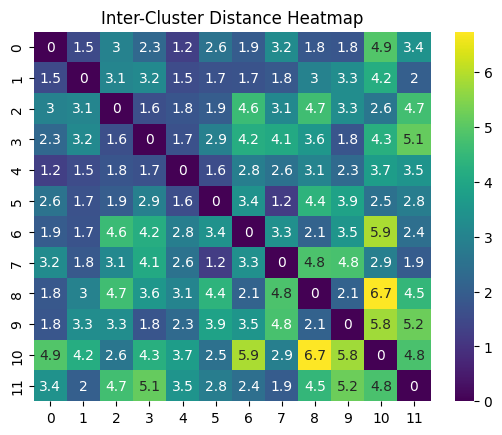

In [42]:
distances = cdist(cluster_centers, cluster_centers, metric='euclidean')
sns.heatmap(distances, annot=True, cmap='viridis', xticklabels=True, yticklabels=True)
plt.title('Inter-Cluster Distance Heatmap')
plt.show()

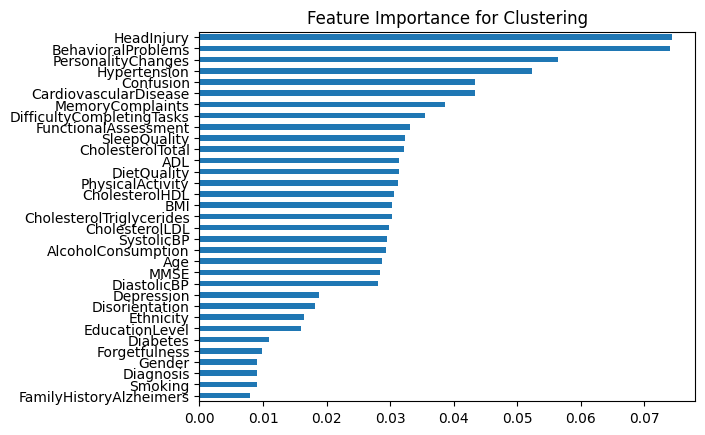

In [43]:
rf = RandomForestClassifier()
rf.fit(resampled_df.drop(columns='Cluster'), resampled_df['Cluster'])
importances = pd.Series(rf.feature_importances_, index=resampled_df.columns[:-1])
importances.sort_values().plot(kind='barh', title='Feature Importance for Clustering')
plt.show()

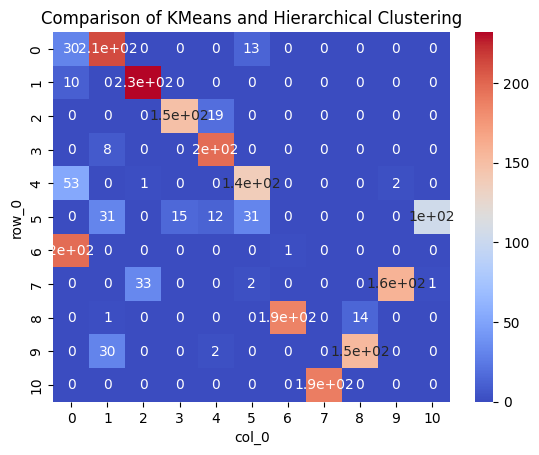

In [45]:
hierarchical = AgglomerativeClustering(n_clusters=n_cluster)
hierarchical_labels = hierarchical.fit_predict(X_umap_2d)

sns.heatmap(pd.crosstab(cluster_labels, hierarchical_labels), annot=True, cmap='coolwarm')
plt.title('Comparison of KMeans and Hierarchical Clustering')
plt.show()

In [46]:
for cluster in resampled_df['Cluster'].unique():
    print(f"Cluster {cluster} Summary:")
    cluster_data = resampled_df[resampled_df['Cluster'] == cluster]
    print(cluster_data.describe(include='all'))
    print("\n")

Cluster 0 Summary:
              Age      Gender   Ethnicity  EducationLevel         BMI  \
count  255.000000  255.000000  255.000000      255.000000  255.000000   
mean    -0.055703    0.178203    0.052464       -0.211254   -0.095586   
std      1.008269    0.976117    1.081391        0.938681    0.961539   
min     -1.658721   -1.012644   -0.700408       -1.422782   -1.726600   
25%     -0.879916   -1.012644   -0.700408       -1.260595   -0.928092   
50%     -0.212368    0.987514   -0.700408       -0.316974   -0.138729   
75%      0.900210    0.987514    0.303713        0.788833    0.679074   
max      1.679015    0.987514    2.311955        1.894641    1.678787   

          Smoking  AlcoholConsumption  PhysicalActivity  DietQuality  \
count  255.000000          255.000000        255.000000   255.000000   
mean    -0.100171           -0.032947          0.027363     0.072845   
std      0.938692            0.955147          0.980382     0.946045   
min     -0.636784           -1.7365

In [47]:
low_silhouette = resampled_df[sil_samples < 0.1]
print(low_silhouette)

           Age    Gender  Ethnicity  EducationLevel       BMI   Smoking  \
33   -1.658721  0.987514   1.307834       -0.316974 -0.689900 -0.636784   
42    0.900210  0.987514  -0.700408       -0.316974  1.149989 -0.636784   
51    1.345242  0.987514  -0.700408        0.788833  1.258652 -0.636784   
60   -0.546142 -1.012644   0.303713       -0.316974 -1.504692 -0.636784   
68    1.679015 -1.012644  -0.700408       -1.422782  1.547911 -0.636784   
...        ...       ...        ...             ...       ...       ...   
2135 -0.255648 -1.012644   0.681820        0.444129  0.470530 -0.636784   
2157 -1.209563  0.987514  -0.353288        1.171107  1.244566 -0.636784   
2179  1.421144 -1.012644   2.311955       -0.316974 -0.322817 -0.055070   
2187 -0.800653  0.987514   0.303713       -0.229441  0.047498 -0.636784   
2196  1.493548 -1.012644  -0.700408        0.788833  0.006065 -0.636784   

      AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
33              0.361

**Preparing UMAP in 3 dimensions**

In [48]:
umap_model_3d = umap.UMAP(n_components=3, random_state=42)
X_umap_3d = umap_model_3d.fit_transform(X_resampled)

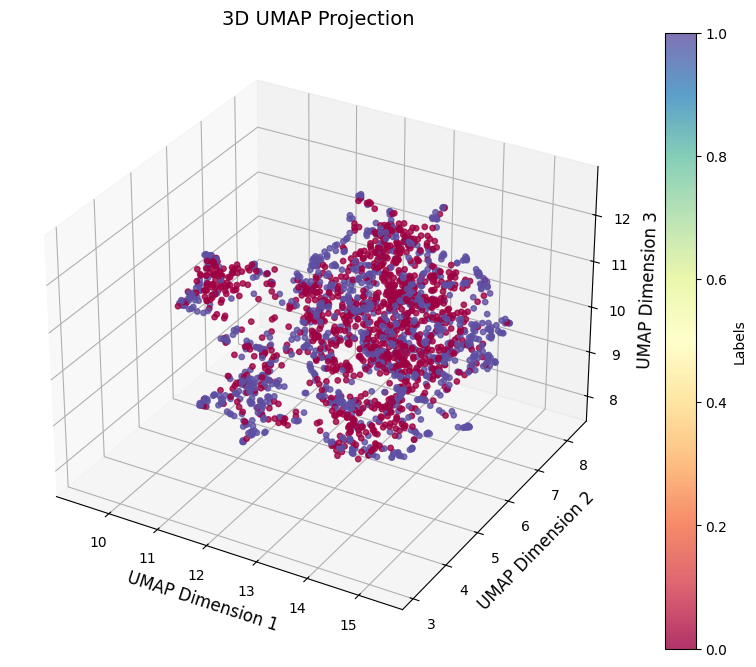

In [49]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X_umap_3d[:, 0], X_umap_3d[:, 1], X_umap_3d[:, 2],
                c=y_resampled, cmap='Spectral', s=15, alpha=0.8)

ax.set_title('3D UMAP Projection', fontsize=14)
ax.set_xlabel('UMAP Dimension 1', fontsize=12)
ax.set_ylabel('UMAP Dimension 2', fontsize=12)
ax.set_zlabel('UMAP Dimension 3', fontsize=12)
plt.colorbar(sc, ax=ax, label='Labels')
plt.show()

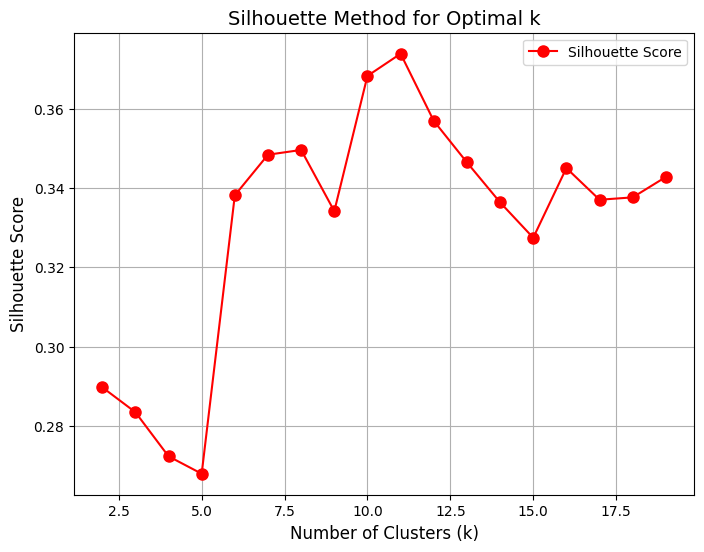

In [50]:
k_values = range(2, 20)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_umap_3d)
    score = silhouette_score(X_umap_3d, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, 'ro-', markersize=8, label='Silhouette Score')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Method for Optimal k', fontsize=14)
plt.legend()
plt.grid()
plt.show()

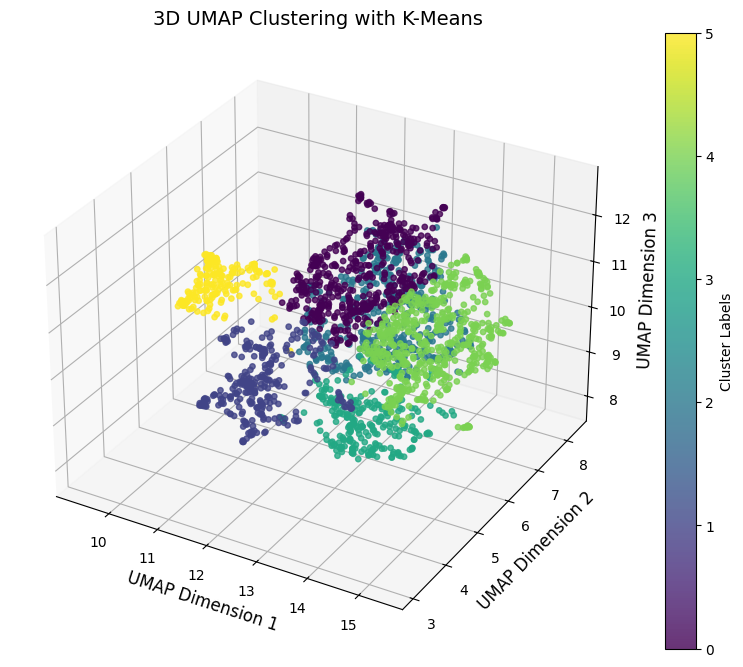

In [51]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(X_umap_3d)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X_umap_3d[:, 0], X_umap_3d[:, 1], X_umap_3d[:, 2],
                c=kmeans_labels, cmap='viridis', s=15, alpha=0.8)

ax.set_title('3D UMAP Clustering with K-Means', fontsize=14)
ax.set_xlabel('UMAP Dimension 1', fontsize=12)
ax.set_ylabel('UMAP Dimension 2', fontsize=12)
ax.set_zlabel('UMAP Dimension 3', fontsize=12)
plt.colorbar(sc, ax=ax, label='Cluster Labels')
plt.show()

### Random Forest
---



In [52]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
RF_pred = RF.predict(X_test)

# Confusion_matrix
confusion_matrix(y_test, RF_pred)
print(classification_report(y_test, RF_pred))

# Accuracy score
accuracy_score(y_test, RF_pred)
print(f" accuracy score: {accuracy_score(y_test, RF_pred)}")

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       277
           1       0.96      0.82      0.89       153

    accuracy                           0.93       430
   macro avg       0.94      0.90      0.92       430
weighted avg       0.93      0.93      0.92       430

 accuracy score: 0.9255813953488372


In both calculations the results are very high which indicates good accuracy of the model.

In [54]:
mse = mean_squared_error(y_test, RF_pred)
r2 = r2_score(y_test, RF_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.07441860465116279
R-squared: 0.6753262074986432


Here we can already see the model fit, which is low in MSE values, meaning that the data does not deviate far from the regression axis

In [55]:
Alz_dt.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

In [56]:
# New data example
new_patient = pd.DataFrame([{
    'Age': 70, 'Gender_Male': 1, 'Ethnicity_White': 1, 'EducationLevel_College': 1, 'BMI': 23.5,
    'Smoking_Yes': 0, 'AlcoholConsumption_Yes': 0, 'PhysicalActivity_Regular': 1, 'DietQuality_Good': 1,
    'SleepQuality_Poor': 0, 'FamilyHistoryAlzheimers': 1, 'CardiovascularDisease': 0,
    'Diabetes': 0, 'Depression': 1, 'HeadInjury': 0, 'Hypertension': 1, 'SystolicBP': 130,
    'DiastolicBP': 80, 'CholesterolTotal': 190, 'CholesterolLDL': 120, 'CholesterolHDL': 50,
    'CholesterolTriglycerides': 150, 'MMSE': 25, 'FunctionalAssessment': 7,
    'MemoryComplaints': 1, 'BehavioralProblems': 0, 'ADL': 5, 'Confusion': 1, 'Disorientation': 1,
    'PersonalityChanges': 0, 'DifficultyCompletingTasks': 1, 'Forgetfulness': 1
}])

# Scaling new data (same as training data)
new_patient_scaled = scaler.transform(new_patient)

# Prediction
prediction = RF.predict(new_patient_scaled)

if prediction[0] == '0':
  print("Healthy")
else:
  print("Alzheimer")

Alzheimer


Then, grid search (hyperparameter optimization) was used to develop the model.

In [57]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

RF = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [58]:
RF_prob = RF.predict_proba(X_test)

print("Probabilities for the first 5 samples:", RF_prob[:5])

Probabilities for the first 5 samples: [[0.92469479 0.07530521]
 [0.81959409 0.18040591]
 [0.7124196  0.2875804 ]
 [0.73409524 0.26590476]
 [0.87926655 0.12073345]]


In [59]:
RF_pred = RF.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, RF_pred))
print("\n")

print("Classification Report:")
print(classification_report(y_test, RF_pred))
print("\n")

accuracy = accuracy_score(y_test, RF_pred)
print(f"Accuracy score: {accuracy}")

mse = mean_squared_error(y_test, RF_pred)
r2 = r2_score(y_test, RF_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Confusion Matrix:
[[272   5]
 [ 25 128]]


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       277
           1       0.96      0.84      0.90       153

    accuracy                           0.93       430
   macro avg       0.94      0.91      0.92       430
weighted avg       0.93      0.93      0.93       430



Accuracy score: 0.9302325581395349
Mean Squared Error: 0.06976744186046512
R-squared: 0.6956183195299781


In order to investigate the effect of dimension reduction using the UMAP method, a model based on reduced dimensions was also tested.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_umap_2d, y_resampled, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       321
           1       0.74      0.69      0.71       347

    accuracy                           0.71       668
   macro avg       0.71      0.71      0.71       668
weighted avg       0.71      0.71      0.71       668



In [61]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

RF = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [62]:
RF_prob = RF.predict_proba(X_test)

print("Probabilities for the first 5 samples:", RF_prob[:5])

Probabilities for the first 5 samples: [[0.02365862 0.97634138]
 [0.65346398 0.34653602]
 [0.23159753 0.76840247]
 [0.02130407 0.97869593]
 [0.25089454 0.74910546]]


In [63]:
RF_pred = RF.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, RF_pred))
print("\n")

print("Classification Report:")
print(classification_report(y_test, RF_pred))
print("\n")

accuracy = accuracy_score(y_test, RF_pred)
print(f"Accuracy score: {accuracy}")

mse = mean_squared_error(y_test, RF_pred)
r2 = r2_score(y_test, RF_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Confusion Matrix:
[[240  81]
 [107 240]]


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       321
           1       0.75      0.69      0.72       347

    accuracy                           0.72       668
   macro avg       0.72      0.72      0.72       668
weighted avg       0.72      0.72      0.72       668



Accuracy score: 0.718562874251497
Mean Squared Error: 0.281437125748503
R-squared: -0.12745652544731434


# Conclusions
___

As we can see from the entire script, the data were correlated only with a few elements in the entire set. Therefore, the data analysis methods we used had different results. The best method turned out to be the UMAP method, which found the most correlations in the code, which is proven by the graphs we presented, as well as numerous correlation matrices and classification report (CR) methods. Of particular importance here is the CR located above, which summarizes our conclusions and the reliability of the performed prediction of the introduction of the next randomized patient. Finally, we can see a strong relationship between head injuries, behavioral problems and personality changes, and disease activity.

# Summary
___
The analysis we conducted significantly changed from our initial expectations, the initial PCA analysis turned out to be completely unnecessary in relation to its results. After later conducting the KMeans analysis using the elbow parameter, it is noticeable how much the positioning changes in relation to the use of UMAP. Only at this point can we find the real correlating values, which we expected to know after conducting PCA. Then we used the obtained elements to analyze the dependencies thanks to the already mentioned UMAP and the KMeans clustering method using the Silhouette parameter. Thanks to this, we were able to emphasize how important the previous calculations turned out to be in the presented calculations.